# PYTHON 3

## Lecture 10.1
### Pandas

<img src="https://avatars.mds.yandex.net/get-entity_search/58808/261054429/S122x122Fit_2x" align="right" style="height: 200px;"/>

### Chupov Dmitrii


MIPT 2024

Pandas &mdash; пакет для статистической обработки данных, по функциональности близкий к SQL и R. Включает в себя функциональность работы с базами данных и таблицами Excel.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import warnings
warnings.simplefilter("ignore", FutureWarning)

### 1. Тип данных `Series`

Одномерный набор данных. Отсутствующий данные записываются как `np.nan`. Например, в этот день термометр сломался или метеоролог был пьян. При вычислении среднего и других операций соответствующие функции не учитывают отсутствующие значения.

In [2]:
l = [1, 3, 5, np.nan, 6, 8]
s = pd.Series(l)
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

**Полезно знать:** Для поиска пропусков есть специальный метод `.isna()`. Он эквивалентен конструкции `s != s`

In [3]:
s.isna()

0    False
1    False
2    False
3     True
4    False
5    False
dtype: bool

Основная информация о наборе данных: количество записей, среднее, стандартное отклонение, минимум, нижний квартиль, медиана, верхний квартиль, максимум, а так же тип данных.

In [4]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

В данном примере обычная индексация.

In [5]:
s[2]

5.0

In [6]:
s[2] = 7
s

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [7]:
s[2:5]

2    7.0
3    NaN
4    6.0
dtype: float64

In [8]:
s1 = s[1:]
s1

1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [9]:
s2 = s[:-1]
s2

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
dtype: float64

В сумме `s1+s2` складываются данные **с одинаковыми индексами**. Поскольку в `s1` нет данного и индексом 0, а в `s2` &mdash; с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`.

In [10]:
s1 + s2

0     NaN
1     6.0
2    14.0
3     NaN
4    12.0
5     NaN
dtype: float64

К наборам данных можно применять функции из `numpy`.

In [11]:
np.exp(s)

0       2.718282
1      20.085537
2    1096.633158
3            NaN
4     403.428793
5    2980.957987
dtype: float64

При создании набора данных `s` мы не указали, что будет играть роль индекса. По умолчанию это последовательность неотрицательных целых чисел 0, 1, 2, ...

In [12]:
s.index

RangeIndex(start=0, stop=6, step=1)

Но можно создавать наборы данных с индексом, заданным списком.

In [13]:
i = list('abcdef')
i

['a', 'b', 'c', 'd', 'e', 'f']

In [14]:
s = pd.Series(l, index=i)
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [15]:
s['c']

5.0

Если индекс &mdash; строка, то вместо `s['c']` можно писать `s.c`.

In [16]:
s.c

5.0

Набор данных можно создать из словаря.

In [17]:
s = pd.Series({'a':1, 'b':2, 'c':0})
s

a    1
b    2
c    0
dtype: int64

Можно отсортировать набор данных.

In [18]:
s.sort_values()

c    0
a    1
b    2
dtype: int64

Роль индекса может играть, скажем, последовательность дат или времён измерения и т.д..

In [19]:
d = pd.date_range('20160101', periods=10)
d

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [20]:
s = pd.Series(sps.norm.rvs(size=10), index=d)
s

2016-01-01   -1.100690
2016-01-02   -0.607138
2016-01-03    1.268569
2016-01-04    1.023828
2016-01-05   -1.283569
2016-01-06    0.878799
2016-01-07    0.994709
2016-01-08   -0.841616
2016-01-09   -1.059865
2016-01-10    1.209186
Freq: D, dtype: float64

Операции сравнения возвращают наборы булевых данных.

In [21]:
s > 0

2016-01-01    False
2016-01-02    False
2016-01-03     True
2016-01-04     True
2016-01-05    False
2016-01-06     True
2016-01-07     True
2016-01-08    False
2016-01-09    False
2016-01-10     True
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть `True`.

In [22]:
s[s > 0]

2016-01-03    1.268569
2016-01-04    1.023828
2016-01-06    0.878799
2016-01-07    0.994709
2016-01-10    1.209186
dtype: float64

Кумулятивные максимумы &mdash; от первого элемента до текущего. Первое значение кумулятивного максимума совпадает с первым значением исходного массива. Далее значение $k$-го элемента есть максимум среди элементов до $k$-го включительно.

In [23]:
s.cummax()

2016-01-01   -1.100690
2016-01-02   -0.607138
2016-01-03    1.268569
2016-01-04    1.268569
2016-01-05    1.268569
2016-01-06    1.268569
2016-01-07    1.268569
2016-01-08    1.268569
2016-01-09    1.268569
2016-01-10    1.268569
Freq: D, dtype: float64

Кумулятивные суммы. Первое значение кумулятивной суммы совпадает с первым значением исходного массива. Далее значение $k$-го элемента есть сумма элементов до $k$-го включительно.

In [24]:
s.cumsum()

2016-01-01   -1.100690
2016-01-02   -1.707829
2016-01-03   -0.439260
2016-01-04    0.584568
2016-01-05   -0.699001
2016-01-06    0.179798
2016-01-07    1.174507
2016-01-08    0.332890
2016-01-09   -0.726975
2016-01-10    0.482211
Freq: D, dtype: float64

Произвольные функции кумулятивным способом можно считать с помощью конструкции `expanding`. Например, так можно посчитать кумулятивные медианы. Будет не быстрее, чем вручную, но аккуратнее.

In [25]:
s.expanding().apply(np.median, raw=True)

2016-01-01   -1.100690
2016-01-02   -0.853914
2016-01-03   -0.607138
2016-01-04    0.208345
2016-01-05   -0.607138
2016-01-06    0.135830
2016-01-07    0.878799
2016-01-08    0.135830
2016-01-09   -0.607138
2016-01-10    0.135830
Freq: D, dtype: float64

Если вы хотите посчитать разности соседних элементов, воспользуйтесь методом `diff`.  Ключевое слово `periods` отвечает за то, с каким шагом будут считаться разности.

In [26]:
s.diff()

2016-01-01         NaN
2016-01-02    0.493552
2016-01-03    1.875707
2016-01-04   -0.244741
2016-01-05   -2.307397
2016-01-06    2.162367
2016-01-07    0.115911
2016-01-08   -1.836326
2016-01-09   -0.218249
2016-01-10    2.269051
Freq: D, dtype: float64

Результат будет иметь тот же размер, но в начале появятся пропущенные значения.  От них можно избавиться при помощи метода `dropna`.

In [27]:
s.diff().dropna()

2016-01-02    0.493552
2016-01-03    1.875707
2016-01-04   -0.244741
2016-01-05   -2.307397
2016-01-06    2.162367
2016-01-07    0.115911
2016-01-08   -1.836326
2016-01-09   -0.218249
2016-01-10    2.269051
Freq: D, dtype: float64

## Наконец, построим график.

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

# Нужно для новых версий библиотек для преобразования дат
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

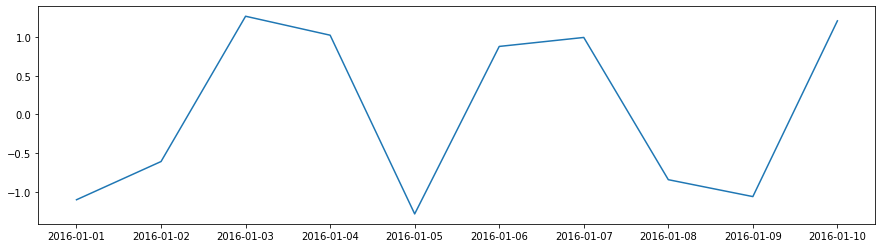

In [30]:
plt.figure(figsize=(15, 4))
plt.plot(s)
plt.show()

Более подробно ознакомиться с методами можно [в официальной документации](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html). 

### 2. Тип данных `DataFrame`

Двумерная таблица данных. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [31]:
d = {'one': pd.Series(range(6), index=list('abcdef')),
     'two': pd.Series(range(7), index=list('abcdefg')),
     'three': pd.Series(sps.norm.rvs(size=7), index=list('abcdefg'))}
df = pd.DataFrame(d)
df

,one,two,three
a,0.0,0,-0.542906
b,1.0,1,-0.406389
c,2.0,2,-0.372887
d,3.0,3,-0.047911
e,4.0,4,0.525983
f,5.0,5,0.316435
g,NaN,6,-0.253895


Таблица с несколькими разными типами данных

In [ ]:
df2 = pd.DataFrame({ 'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)),
                                    dtype='float32'),
                     'D': np.array([3] * 4,
                                   dtype='int32'),
                     'E': pd.Categorical(["test", "train",
                                          "test", "train"]),
                     'F': 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [33]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

#### 2.1 Данные

Вернемся к первой таблице и посмотрим на ее начало и конец

In [34]:
df.head()

,one,two,three
a,0.0,0,-0.542906
b,1.0,1,-0.406389
c,2.0,2,-0.372887
d,3.0,3,-0.047911
e,4.0,4,0.525983


In [35]:
df.tail(3)

,one,two,three
e,4.0,4,0.525983
f,5.0,5,0.316435
g,NaN,6,-0.253895


Индексы

In [36]:
df.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')

Названия колонок

In [37]:
df.columns

Index(['one', 'two', 'three'], dtype='object')

Получение обычной матрицы данных

In [38]:
df.values

array([[ 0.        ,  0.        , -0.54290577],
       [ 1.        ,  1.        , -0.40638852],
       [ 2.        ,  2.        , -0.3728874 ],
       [ 3.        ,  3.        , -0.04791126],
       [ 4.        ,  4.        ,  0.52598272],
       [ 5.        ,  5.        ,  0.31643534],
       [        nan,  6.        , -0.2538949 ]])

Описательные статистики

In [39]:
df.describe()

,one,two,three
count,6.000000,7.000000,7.000000
mean,2.500000,3.000000,-0.111653
std,1.870829,2.160247,0.399004
min,0.000000,0.000000,-0.542906
25%,1.250000,1.500000,-0.389638
50%,2.500000,3.000000,-0.253895
75%,3.750000,4.500000,0.134262
max,5.000000,6.000000,0.525983


Транспонирование данных

In [40]:
df.T

,a,b,c,d,e,f,g
one,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,NaN
two,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000
three,-0.542906,-0.406389,-0.372887,-0.047911,0.525983,0.316435,-0.253895


Сортировка по столбцу

In [41]:
df.sort_values(by='three', ascending=False)

,one,two,three
e,4.0,4,0.525983
f,5.0,5,0.316435
d,3.0,3,-0.047911
g,NaN,6,-0.253895
c,2.0,2,-0.372887
b,1.0,1,-0.406389
a,0.0,0,-0.542906


#### 2.2 Индексация

В отличии от обычной системы индексации в Python и Numpy, в Pandas принята иная система индексации, которая является несколько нелогичной, однако, на практике часто оказывается удобной при обработке сильно неоднородных данных.
Для написания продуктивного кода при обработке большого объема данных стоит использовать атрибуты `.at`, `.iat`, `.loc`, `.iloc`, `.ix`.

Если в качестве индекса указать имя столбца, получится одномерный набор данных типа `Series`.

In [43]:
df['one']

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

К столбцу можно обращаться как к полю объекта, если имя столбца позволяет это сделать.

In [44]:
df.one

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

Индексы полученного одномерного набора данных.

In [45]:
df['one'].index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')

У данного столбца есть имя, его можно получить следующим образом.

In [46]:
df['one'].name

'one'

Получение элемента массива

In [47]:
df['one']['c']

2.0

Правила индексации в pandas несколько отличаются от общепринятых. Если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [48]:
df['b':'d']

,one,two,three
b,1.0,1,-0.406389
c,2.0,2,-0.372887
d,3.0,3,-0.047911


Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным, хотя и удобно на практике.

In [49]:
df[1:3]

,one,two,three
b,1.0,1,-0.406389
c,2.0,2,-0.372887


Логичнее работает атрибут `loc`: первая позиция &mdash; всегда индекс строки, а вторая &mdash; столбца.

In [50]:
df.loc['b']

one      1.000000
two      1.000000
three   -0.406389
Name: b, dtype: float64

In [51]:
df.loc['b', 'one']

1.0

In [52]:
df.loc['a':'b', 'one']

a    0.0
b    1.0
Name: one, dtype: float64

In [53]:
df.loc['a':'b', :]

,one,two,three
a,0.0,0,-0.542906
b,1.0,1,-0.406389


In [54]:
df.loc[:, 'one']

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

Атрибут `iloc` подобен `loc`: первый индекс &mdash; номер строки, второй &mdash; номер столбца. Это целые числа, конец диапазона не включается как обычно в питоне.

In [55]:
df.iloc[2]

one      2.000000
two      2.000000
three   -0.372887
Name: c, dtype: float64

In [56]:
df.iloc[1:3]

,one,two,three
b,1.0,1,-0.406389
c,2.0,2,-0.372887


In [57]:
df.iloc[1:3, 0:2]

,one,two
b,1.0,1
c,2.0,2


Булевская индексация &mdash; выбор строк с заданным условием

In [58]:
df[df.three > 0]

,one,two,three
e,4.0,4,0.525983
f,5.0,5,0.316435


#### 2.3 Query

Pandas предлагает множество способов выбора строк из фрейма данных. Кроме функции `loc` существует функция `query`

In [60]:
data = pd.DataFrame({'A': range (1,6 ),
                     'B': range (10,0 , -2),
                     'C C': range(10,5 , -1)})
data

,A,B,C C
0,1,10,10
1,2,8,9
2,3,6,8
3,4,4,7
4,5,2,6


In [61]:
data.query('A > B')

,A,B,C C
4,5,2,6


Предыдущее выражение эквивалентно

In [62]:
data[data.A > data.B]

,A,B,C C
4,5,2,6


Для столбцов с пробелами в их названиях можно использовать кавычки с обратными метками.

In [63]:
data.query('B == `C C`')

,A,B,C C
0,1,10,10


Предыдущее выражение эквивалентно

In [64]:
data[data.B == data['C C']]

,A,B,C C
0,1,10,10


#### 2.4 Изменение таблиц

К таблице можно добавлять новые столбцы.

In [65]:
df['4th'] = df['one'] * df['two']
df['flag'] = df['two'] > 2
df

,one,two,three,4th,flag
a,0.0,0,-0.542906,0.0,False
b,1.0,1,-0.406389,1.0,False
c,2.0,2,-0.372887,4.0,False
d,3.0,3,-0.047911,9.0,True
e,4.0,4,0.525983,16.0,True
f,5.0,5,0.316435,25.0,True
g,NaN,6,-0.253895,NaN,True


И удалять имеющиеся.

In [66]:
del df['two']
df['foo'] = 0
df

,one,three,4th,flag,foo
a,0.0,-0.542906,0.0,False,0
b,1.0,-0.406389,1.0,False,0
c,2.0,-0.372887,4.0,False,0
d,3.0,-0.047911,9.0,True,0
e,4.0,0.525983,16.0,True,0
f,5.0,0.316435,25.0,True,0
g,NaN,-0.253895,NaN,True,0


Изменение элемента

In [67]:
df.iat[1, 0] = -1

# Эквивалентные формы:
# df['one']['b'] = -1  <--  SettingWithCopyWarning
# df.at['b', 'one'] = -1

df

,one,three,4th,flag,foo
a,0.0,-0.542906,0.0,False,0
b,-1.0,-0.406389,1.0,False,0
c,2.0,-0.372887,4.0,False,0
d,3.0,-0.047911,9.0,True,0
e,4.0,0.525983,16.0,True,0
f,5.0,0.316435,25.0,True,0
g,NaN,-0.253895,NaN,True,0


Добавим копию столбца `one`, в которую входят только строки до третьей.

In [68]:
df['one_tr'] = df['one'][:3]
df

,one,three,4th,flag,foo,one_tr
a,0.0,-0.542906,0.0,False,0,0.0
b,-1.0,-0.406389,1.0,False,0,-1.0
c,2.0,-0.372887,4.0,False,0,2.0
d,3.0,-0.047911,9.0,True,0,NaN
e,4.0,0.525983,16.0,True,0,NaN
f,5.0,0.316435,25.0,True,0,NaN
g,NaN,-0.253895,NaN,True,0,NaN


#### 2.5 Пропуски

Удаление всех строк с пропусками

In [69]:
df.dropna(how='any')

,one,three,4th,flag,foo,one_tr
a,0.0,-0.542906,0.0,False,0,0.0
b,-1.0,-0.406389,1.0,False,0,-1.0
c,2.0,-0.372887,4.0,False,0,2.0


Замена всех пропусков на значение

In [70]:
df.fillna(value=666)

,one,three,4th,flag,foo,one_tr
a,0.0,-0.542906,0.0,False,0,0.0
b,-1.0,-0.406389,1.0,False,0,-1.0
c,2.0,-0.372887,4.0,False,0,2.0
d,3.0,-0.047911,9.0,True,0,666.0
e,4.0,0.525983,16.0,True,0,666.0
f,5.0,0.316435,25.0,True,0,666.0
g,666.0,-0.253895,666.0,True,0,666.0


Замена всех пропусков на среднее по столбцу

In [71]:
df.fillna(value=df.mean())

,one,three,4th,flag,foo,one_tr
a,0.000000,-0.542906,0.000000,False,0,0.000000
b,-1.000000,-0.406389,1.000000,False,0,-1.000000
c,2.000000,-0.372887,4.000000,False,0,2.000000
d,3.000000,-0.047911,9.000000,True,0,0.333333
e,4.000000,0.525983,16.000000,True,0,0.333333
f,5.000000,0.316435,25.000000,True,0,0.333333
g,2.166667,-0.253895,9.166667,True,0,0.333333


Булевская маска пропущенных значений

In [72]:
df.isnull()

,one,three,4th,flag,foo,one_tr
a,False,False,False,False,False,False
b,False,False,False,False,False,False
c,False,False,False,False,False,False
d,False,False,False,False,False,True
e,False,False,False,False,False,True
f,False,False,False,False,False,True
g,True,False,True,False,False,True


#### 2.6 Простые операции

Создадим таблицу из массива случайных чисел.

In [73]:
df1 = pd.DataFrame(sps.uniform.rvs(size=(10, 4)),
                   columns=['A', 'B', 'C', 'D'])
df1

,A,B,C,D
0,0.459822,0.156361,0.140080,0.582276
1,0.233602,0.540536,0.773553,0.237599
2,0.126075,0.212625,0.715625,0.522497
3,0.943916,0.921324,0.162516,0.691716
4,0.471539,0.149148,0.674082,0.179191
5,0.131999,0.722460,0.352341,0.178990
6,0.247497,0.596999,0.492316,0.573033
7,0.915275,0.240915,0.237264,0.180931
8,0.543690,0.128554,0.139226,0.018398
9,0.190750,0.225518,0.268433,0.345286


In [74]:
df2 = pd.DataFrame(sps.uniform.rvs(size=(7, 3)),
                   columns=['A', 'B', 'C'])
df2

,A,B,C
0,0.785366,0.800206,0.358125
1,0.385376,0.969908,0.195000
2,0.638482,0.502140,0.956010
3,0.474895,0.293395,0.014651
4,0.328143,0.936700,0.771902
5,0.373467,0.140538,0.445425
6,0.218142,0.942851,0.136191


In [75]:
df1 + df2

,A,B,C,D
0,1.245187,0.956567,0.498205,NaN
1,0.618978,1.510444,0.968553,NaN
2,0.764557,0.714765,1.671636,NaN
3,1.418812,1.214719,0.177167,NaN
4,0.799683,1.085848,1.445983,NaN
5,0.505466,0.862998,0.797766,NaN
6,0.465639,1.539850,0.628507,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [76]:
2 * df1 + 3

,A,B,C,D
0,3.919643,3.312722,3.280159,4.164552
1,3.467203,4.081072,4.547107,3.475197
2,3.252149,3.425250,4.431251,4.044995
3,4.887833,4.842648,3.325032,4.383433
4,3.943078,3.298295,4.348163,3.358381
5,3.263998,4.444919,3.704681,3.357980
6,3.494993,4.193998,3.984631,4.146066
7,4.830549,3.481829,3.474527,3.361861
8,4.087380,3.257108,3.278451,3.036795
9,3.381501,3.451037,3.536866,3.690573


In [77]:
np.sin(df1)

,A,B,C,D
0,0.443788,0.155724,0.139622,0.549926
1,0.231483,0.514596,0.698682,0.235369
2,0.125741,0.211027,0.656089,0.499046
3,0.809862,0.796403,0.161801,0.637860
4,0.454258,0.148595,0.624180,0.178233
5,0.131616,0.661232,0.345096,0.178036
6,0.244978,0.562163,0.472668,0.542183
7,0.792730,0.238591,0.235044,0.179945
8,0.517298,0.128200,0.138776,0.018397
9,0.189596,0.223612,0.265221,0.338466


Построим графики кумулятивных сумм

In [78]:
cs = df1.cumsum()
cs

,A,B,C,D
0,0.459822,0.156361,0.140080,0.582276
1,0.693423,0.696897,0.913633,0.819874
2,0.819498,0.909522,1.629258,1.342372
3,1.763414,1.830846,1.791774,2.034088
4,2.234954,1.979994,2.465856,2.213279
5,2.366953,2.702453,2.818196,2.392269
6,2.614449,3.299452,3.310512,2.965302
7,3.529724,3.540367,3.547775,3.146232
8,4.073414,3.668921,3.687001,3.164630
9,4.264164,3.894439,3.955434,3.509916


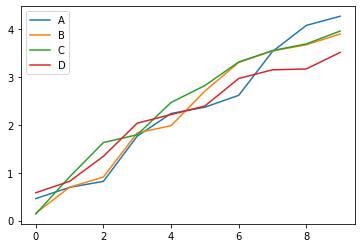

In [79]:
cs.plot()
plt.show()

### 3. Чтение и запись данных

**Загрузка текстовых файлов табличного вида** производится с помощью функции `pd.read_csv`. Основные аргументы следующие:
* `filepath_or_buffer` &mdash; пусть к файлу;
* `sep` &mdash; разделитель колонок в строке (запятая, табуляция и т.д.);
* `header` &mdash; номер строки или список номеров строк, используемых в качестве имен колонок;
* `names` &mdash; список имен, которые будут использованы в качестве имен колонок;
* `index_col` &mdash; колонка, используемая в качестве индекса;
* `usecols` &mdash; список имен колонок, которые будут загружены;
* `nrows` &mdash; сколько строк прочитать;
* `skiprows` &mdash; номера строк с начала, которые нужно пропустить;
* `skipfooter` &mdash; сколько строк в конце пропустить;
* `na_values` &mdash; список значений, которые распознавать как пропуски;
* `parse_dates` &mdash; распознавать ли даты, можно передать номера строк;
* `date_parser` &mdash; парсер дат;
* `dayfirst` &mdash; день записывается перед месяцем или после;
* `thousands` &mdash; разделитель тысяч;
* `decimal` &mdash; разделитель целой и дробной частей;
* `comment` &mdash; символ начала комментария.

Полный список параметров:

`pd.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)`

**Загрузка таблиц формата Excel** производится с помощью функции `pd.read_excel`. Основные аргументы следующие:
* `io` &mdash; пусть к файлу;
* `sheetname` &mdash; какие листы таблицы загрузить;
* Остальные параметры аналогично.

`pd.read_excel(io, sheetname=0, header=0, skiprows=None, skip_footer=0, index_col=None, names=None, parse_cols=None, parse_dates=False, date_parser=None, na_values=None, thousands=None, convert_float=True, has_index_names=None, converters=None, dtype=None, true_values=None, false_values=None, engine=None, squeeze=False, **kwds)`


**Запись таблицы в текстовый файл** производится с помощью функции `df.to_csv`. Основные аргументы следующие:
* `df` &mdash; DataFrame, который нужно записать;
* `path_or_buf` &mdash; путь, куда записать;
* `sep` &mdash; разделитель колонок в строке (запятая, табуляция и т.д.);
* `na_rep` &mdash; как записать пропуски;
* `float_format` &mdash; формат записи дробных чисел;
* `columns` &mdash; какие колонки записать;
* `header` &mdash; как назвать колонки при записи;
* `index` &mdash; записывать ли индексы в файл;
* `index_label` &mdash; имена индексов, которые записать в файл.



Полный список параметров:

`df.to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=False, date_format=None, doublequote=True, escapechar=None, decimal='.')`


**Запись таблицы в формат Excel** производится с помощью функции `df.to_excel`. Основные аргументы аналогичные. Полный список параметров:

`df.to_excel(excel_writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True, freeze_panes=None)`

### 4. Примеры чтения данных и работы с датами

Прочитаем файл, который содержит два столбца &mdash; дата и число. Столбцы разделяются табуляцией.

In [76]:
df = pd.read_csv('./example.csv', sep='\t', parse_dates=[0])
df.head()

,Time,Value
0,2019-01-09,66
1,2019-02-09,34
2,2019-03-09,18
3,2019-04-09,32
4,2019-05-09,84


В информации о таблице видим, что дата определилась, т.к. формат колонки `Time` обозначен как `datetime64[ns]`.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
Time     18 non-null datetime64[ns]
Value    18 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 416.0 bytes


Но при печати понимаем, что часть дат распозналась неправильно. Если число месяца меньше 13, то pandas путает день и месяц. В одном и том же столбце. Кошмар...

In [78]:
df['Time']

0    2019-01-09
1    2019-02-09
2    2019-03-09
3    2019-04-09
4    2019-05-09
5    2019-06-09
6    2019-07-09
7    2019-08-09
8    2019-09-09
9    2019-10-09
10   2019-11-09
11   2019-12-09
12   2019-09-13
13   2019-09-14
14   2019-09-15
15   2019-09-16
16   2019-09-17
17   2019-09-18
Name: Time, dtype: datetime64[ns]

Укажем, что день всегда следует первым. Теперь все правильно

In [79]:
df = pd.read_csv('./example.csv', sep='\t', parse_dates=[0],
                 dayfirst=True)
df['Time']

0    2019-09-01
1    2019-09-02
2    2019-09-03
3    2019-09-04
4    2019-09-05
5    2019-09-06
6    2019-09-07
7    2019-09-08
8    2019-09-09
9    2019-09-10
10   2019-09-11
11   2019-09-12
12   2019-09-13
13   2019-09-14
14   2019-09-15
15   2019-09-16
16   2019-09-17
17   2019-09-18
Name: Time, dtype: datetime64[ns]

Панды довольно ленивые, и если не попросить pandas распознать дату, то ничего делать не будет &mdash; оставит ее как `object`.

In [80]:
df = pd.read_csv('./example.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
Time     18 non-null object
Value    18 non-null int64
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


Тогда можно воспользоваться функцией `pd.to_datetime`

In [81]:
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True)
df['Time']

0    2019-09-01
1    2019-09-02
2    2019-09-03
3    2019-09-04
4    2019-09-05
5    2019-09-06
6    2019-09-07
7    2019-09-08
8    2019-09-09
9    2019-09-10
10   2019-09-11
11   2019-09-12
12   2019-09-13
13   2019-09-14
14   2019-09-15
15   2019-09-16
16   2019-09-17
17   2019-09-18
Name: Time, dtype: datetime64[ns]

Установим дату как индекс, получив временной ряд.

In [82]:
df = df.set_index('Time')
df

,Value
Time,
2019-09-01,66
2019-09-02,34
2019-09-03,18
2019-09-04,32
2019-09-05,84
2019-09-06,27
2019-09-07,45
2019-09-08,84
2019-09-09,42


Его можно нарисовать

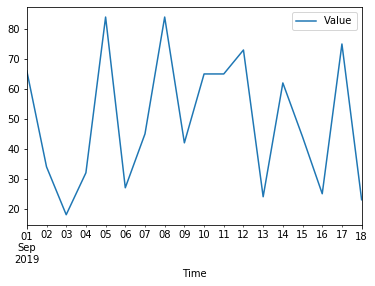

In [83]:
df.plot();

Усреднение данных по трем дням

In [84]:
df.resample('3D').mean()

,Value
Time,
2019-09-01,39.333333
2019-09-04,47.666667
2019-09-07,57.000000
2019-09-10,67.666667
2019-09-13,43.333333
2019-09-16,41.000000


### 5. Интервалы времени

Интервал времени задается объектом `pd.Timedelta`

Возможные обозначения интервалов: `'Y', 'M', 'W', 'D', 'days', 'day', 'hours', hour', 'hr', 'h', 'm', 'minute', 'min', 'minutes', 'T', 'S', 'seconds', 'sec', 'second', 'ms', 'milliseconds', 'millisecond', 'milli', 'millis', 'L', 'us', 'microseconds', 'microsecond', 'micro', 'micros', 'U', 'ns', 'nanoseconds', 'nano', 'nanos', 'nanosecond', 'N'`

Например, интервал времени в 5 недель 6 дней 5 часов 37 минут 23 секунды 12 милисекунд:

In [85]:
pd.Timedelta('5W 6 days 5hr 37min 23sec 12ms')

Timedelta('41 days 05:37:23.012000')

Поробуем понять что такое `Y` и `M`.

In [86]:
pd.Timedelta('1Y'), pd.Timedelta('1M')

(Timedelta('365 days 05:49:12'), Timedelta('0 days 00:01:00'))

Символ `Y` обозначает год. Он сделан таким из-за високосных годов. Поскольку месяцы разной длины, то их вообще нельзя здесь задать. Поэтому `M` обозначает минуты.

Интервал можно добавить к какой-нибудь дате, или вычесть из нее.

In [87]:
pd.to_datetime('2019.09.18 18:30') \
    + pd.Timedelta('8hr 37min 23sec 12ms')

Timestamp('2019-09-19 03:07:23.012000')

In [88]:
pd.to_datetime('2019.09.18 18:30') \
    - pd.Timedelta('20hr 50min 23sec 12ms')

Timestamp('2019-09-17 21:39:36.988000')

Сделать регулярный список дат позволяет функция `pd.timedelta_range`, которая реализует функционал `range` для дат. Ей нужно передать **ровно три аргумента** из следующих четырех:
* `start` &mdash; интервал начала отчета;
* `end` &mdash; интервал окончания отчета;
* `periods` &mdash; количество интервалов;
* `freq` &mdash; частота отсчета.

**Пример** 
<img src="https://mipt-stats.gitlab.io/images/m/temperature.jpg" width="140" align="right">  
Врач на протяжении дня измеряет пациенту температуру каждые 3 часа в течение 2 недель. Также пациенту необходимо спать с 11 вечера до 7 утра. Каждый день измерения температуры начинаются в 8 часов. Первое измерение 22 марта 2020 года. Определите моменты времени, когда нужно измерить пациенту температуру.

In [89]:
# Периоды измерения температуры днем
periods = pd.timedelta_range(start='8H', freq='3H', end='23H')
periods

TimedeltaIndex(['08:00:00', '11:00:00', '14:00:00', '17:00:00', '20:00:00',
                '23:00:00'],
               dtype='timedelta64[ns]', freq='3H')

In [90]:
# Даты измерний температуры
dates = pd.to_datetime('2020.03.22') \
    + pd.timedelta_range(start=0, freq='1D', end='2W')
dates

DatetimeIndex(['2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04', '2020-04-05'],
              dtype='datetime64[ns]', freq='D')

In [91]:
# Время измерния температуры
n, m = len(dates), len(periods)
dates_new = dates.repeat(m)
periods_new = pd.to_timedelta(np.tile(periods, n))
time = dates_new + periods_new
time

DatetimeIndex(['2020-03-22 08:00:00', '2020-03-22 11:00:00',
               '2020-03-22 14:00:00', '2020-03-22 17:00:00',
               '2020-03-22 20:00:00', '2020-03-22 23:00:00',
               '2020-03-23 08:00:00', '2020-03-23 11:00:00',
               '2020-03-23 14:00:00', '2020-03-23 17:00:00',
               '2020-03-23 20:00:00', '2020-03-23 23:00:00',
               '2020-03-24 08:00:00', '2020-03-24 11:00:00',
               '2020-03-24 14:00:00', '2020-03-24 17:00:00',
               '2020-03-24 20:00:00', '2020-03-24 23:00:00',
               '2020-03-25 08:00:00', '2020-03-25 11:00:00',
               '2020-03-25 14:00:00', '2020-03-25 17:00:00',
               '2020-03-25 20:00:00', '2020-03-25 23:00:00',
               '2020-03-26 08:00:00', '2020-03-26 11:00:00',
               '2020-03-26 14:00:00', '2020-03-26 17:00:00',
               '2020-03-26 20:00:00', '2020-03-26 23:00:00',
               '2020-03-27 08:00:00', '2020-03-27 11:00:00',
               '2020-03-